# Detection and Removal of Outliers

What are Outliers?<br>

-> Outliers are data points that significantly differ from the rest of the data which are mostly extremes - either much higher or much lower than the majority of observations. 

In [61]:
# importing necessary libraries 
import numpy as np 
import pandas as pd
import seaborn as sb 

# creating a sample dataframe 
df = pd.DataFrame({'Age':[20,21,23,25,26,28,30,31,33,34,36,80]}) 

In [62]:
df

,Age
0,20
1,21
2,23
3,25
4,26
5,28
6,30
7,31
8,33
9,34


Methods of detecting Outliers<br>

a. Visual Methods:<br> 

i. Box plot

<Axes: ylabel='Age'>

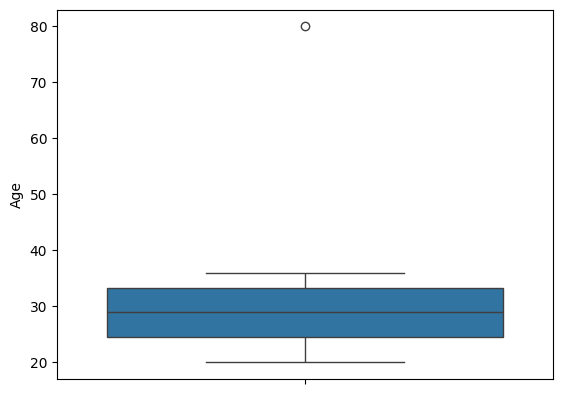

In [63]:
# viewing outliers using boxplot 
sb.boxplot(df['Age'])

ii. Scatter plot

<Axes: ylabel='Age'>

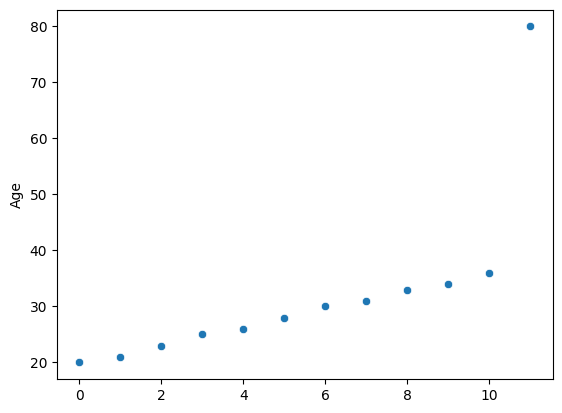

In [64]:
# viewing outliers using scatter plot 
sb.scatterplot(x=np.arange(df.shape[0]),y=df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

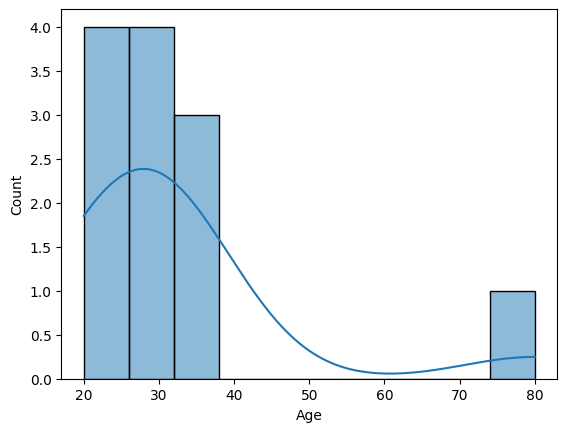

In [65]:
# additional visual method of detecting outliers i.e. using histplot 
sb.histplot(df['Age'],bins=10,kde=True) 

b. Statistical Method i.e. Z-score

In [66]:
# detecting outliers using z-score 
df['z_score'] = (df['Age'] - df['Age'].mean())/df['Age'].std() 
df['outlier'] = df['z_score'].apply(lambda x: 'Yes' if np.abs(x) > 3 else 'No') 
df

,Age,z_score,outlier
0,20,-0.771087,No
1,21,-0.708141,No
2,23,-0.582249,No
3,25,-0.456357,No
4,26,-0.393412,No
5,28,-0.267520,No
6,30,-0.141628,No
7,31,-0.078682,No
8,33,0.047209,No
9,34,0.110155,No


<b>Interpretation:</b> index-no.11 is a outlier as it has z-score over 3.

In [67]:
# detecting outliers using Z-score method and custom data by importing scipy library 
from scipy import stats 
# sample data 
data = [10,12,12,13,12,11,12,14,13,110] 
z_scores = stats.zscore(data) 
threshold = 2.5
outliers = np.where(z_scores>threshold)[0] 
data[outliers[0]]

110

Removal of outliers

In [68]:
# making a custom dataframe and removing outliers using z-score method 
df = pd.DataFrame({'Experience': [1,2,4,5,3,4,5,7,8,8,9,11,45]}) 
df

,Experience
0,1
1,2
2,4
3,5
4,3
5,4
6,5
7,7
8,8
9,8


In [69]:
# calculating z-score and marking outliers
df['z_score'] = (df['Experience'] - df['Experience'].mean())/df['Experience'].std() 
df['outlier'] = df['z_score'].apply(lambda x: 'Yes' if np.abs(x) > 3 else 'No') 
df

,Experience,z_score,outlier
0,1,-0.673314,No
1,2,-0.584899,No
2,4,-0.408069,No
3,5,-0.319654,No
4,3,-0.496484,No
5,4,-0.408069,No
6,5,-0.319654,No
7,7,-0.142824,No
8,8,-0.054409,No
9,8,-0.054409,No


In [70]:
# removing outliers 
df_no_outliers = df[df['outlier']=='No'] 
df_no_outliers = df_no_outliers.drop(['z_score','outlier'],axis=1)
df_no_outliers

,Experience
0,1
1,2
2,4
3,5
4,3
5,4
6,5
7,7
8,8
9,8


In [71]:
# removing outliers by IQR method with custom data 
df = pd.DataFrame({'Salary':[1000,1200,1300,1400,1500,1600,1700,1800,1900,2000,30000]})
df

,Salary
0,1000
1,1200
2,1300
3,1400
4,1500
5,1600
6,1700
7,1800
8,1900
9,2000


In [72]:
Q1 = df['Salary'].quantile(0.25) 
Q3 = df['Salary'].quantile(0.75) 
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5*IQR 
upper_bound = Q3 + 1.5*IQR 
df['outlier'] = df['Salary'].apply(lambda x: 'Yes' if (x<lower_bound) | (x>upper_bound) else 'No')
df

,Salary,outlier
0,1000,No
1,1200,No
2,1300,No
3,1400,No
4,1500,No
5,1600,No
6,1700,No
7,1800,No
8,1900,No
9,2000,No


In [73]:
df_no_outliers = df[df['outlier']=='No'] 
df_no_outliers = df_no_outliers.drop(['outlier'],axis=1) 
df_no_outliers

,Salary
0,1000
1,1200
2,1300
3,1400
4,1500
5,1600
6,1700
7,1800
8,1900
9,2000
